## Import of libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import sklearn
import csv
sns.set_style("darkgrid")

## Data Preparation and Cleaning

### Loading data

In [3]:
df = pd.read_csv("..\data\smart_store_reviews.csv")


### First 5 rows

In [4]:
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,en,apparel
1,en_0200890,product_en_0888882,reviewer_en_0702203,1,"No pressure, not a great hose for anything!!","Waste of Money!! No pressure, not good for fil...",en,lawn_and_garden
2,en_0949818,product_en_0969532,reviewer_en_0662404,1,I ordered 11 or 12 cds...will NEVER order them...,They skip and have very very very poor sound q...,en,other
3,en_0681307,product_en_0851291,reviewer_en_0843843,1,"too bunchy inside of shoes or boots, did not w...",awkward and uncomfortable; do not work,en,other
4,en_0846533,product_en_0633896,reviewer_en_0315301,1,Took a dump quit working after 3 weeks,Poor quality apparently.,en,wireless


### Columns and their types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      209977 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.8+ MB


In [6]:
df.shape

(210000, 8)

### Basic info for every column

In [7]:
df.describe(include='all')

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
count,210000,210000,210000,210000.000000,210000,209977,210000,210000
unique,210000,194104,206410,NaN,209393,143874,1,31
top,en_0199937,product_en_0184780,reviewer_en_0857640,NaN,Smaller than expected,Three Stars,en,home
freq,1,6,5,NaN,29,4366,210000,18509
mean,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.414217,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [8]:
print(df.stars.median())

3.0


### Number of null values in each column

In [9]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_count

review_title        23
review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
language             0
product_category     0
dtype: int64

### Rows with null values

In [10]:
missing = df[df.isnull().any(axis=1)]
missing

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
11328,en_0363452,product_en_0991504,reviewer_en_0350541,1,Garbage!!!!!! Do not buy!!!!!! Very bad recept...,NaN,en,electronics
24676,en_0584273,product_en_0593276,reviewer_en_0270470,1,I never received your product.,NaN,en,camera
32717,en_0672094,product_en_0859343,reviewer_en_0987098,1,Birds just don't seem to like this brand. What...,NaN,en,lawn_and_garden
44799,en_0342117,product_en_0720417,reviewer_en_0712502,2,Nice modern farmhouse touch to decor. Color is...,NaN,en,furniture
63134,en_0991985,product_en_0392192,reviewer_en_0031515,2,I didn’t like these type of cups,NaN,en,toy
80392,en_0684361,product_en_0827066,reviewer_en_0375788,2,They r nice but they don’t stay in the ears,NaN,en,wireless
87901,en_0329950,product_en_0701608,reviewer_en_0821370,3,It was too much to my liking. I had to stuff i...,NaN,en,luggage
89371,en_0091490,product_en_0050197,reviewer_en_0517779,3,shoelaces were too short. need more length.,NaN,en,shoes
95785,en_0184651,product_en_0214004,reviewer_en_0065413,3,Not loving it to much..its ok,NaN,en,automotive
102315,en_0216864,product_en_0116972,reviewer_en_0323091,3,I don't have a review for this product as I ha...,NaN,en,video_games


### Number of duplicate rows

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


## Exploratory Analysis and Visualization

In [12]:
df.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

### Languages

> Number of unique languages

In [13]:
languages = df.language.unique()
len(languages)

1

### Product category

> Number of uniqe categories

In [14]:
categories = df.product_category.unique()
len(categories)

31

> Count of reviews for each category

In [15]:
categories_by_review = df.product_category.value_counts()
categories_by_review

home                        18509
apparel                     16742
wireless                    16459
other                       14104
beauty                      12736
drugstore                   12335
kitchen                     10902
toy                          9203
sports                       8719
automotive                   7871
lawn_and_garden              7695
home_improvement             7513
pet_products                 7432
digital_ebook_purchase       7071
pc                           6709
electronics                  6521
office_product               5777
shoes                        5450
grocery                      4950
book                         3943
baby_product                 3302
furniture                    3105
jewelry                      2892
camera                       2245
industrial_supplies          2118
digital_video_download       1447
luggage                      1397
musical_instruments          1151
video_games                   836
watch         

<AxesSubplot:>

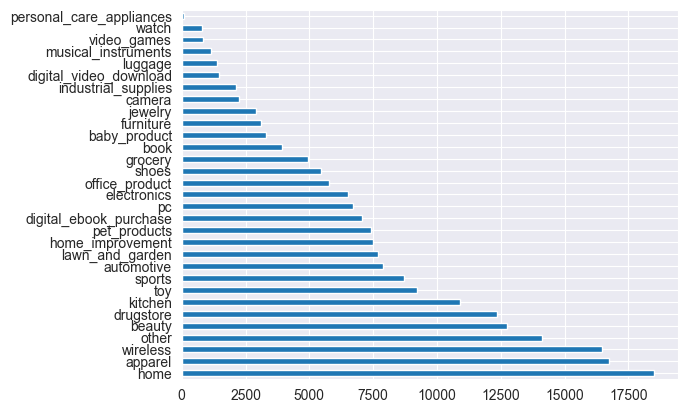

In [16]:
categories_by_review.plot(kind='barh')

<AxesSubplot:xlabel='product_category', ylabel='Count'>

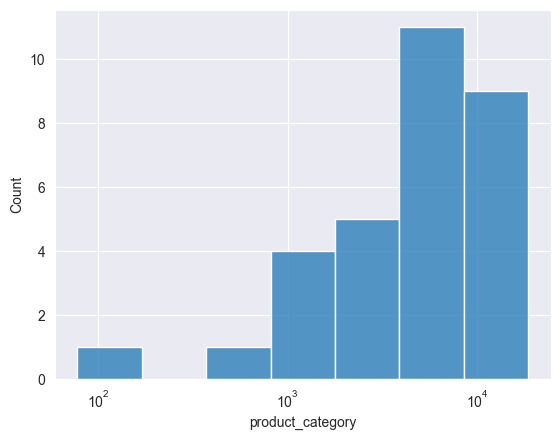

In [17]:
sns.histplot(categories_by_review, log_scale=True)

### Stars

> Number of unique stars

In [18]:
stars = df.stars.unique()
len(stars)

5

> Average of given stars

In [19]:
avg = df.stars.unique()

> Count of reviews for each star

In [20]:
stars_by_review = df.stars.value_counts()
stars_by_review

1    42000
2    42000
3    42000
4    42000
5    42000
Name: stars, dtype: int64

<AxesSubplot:>

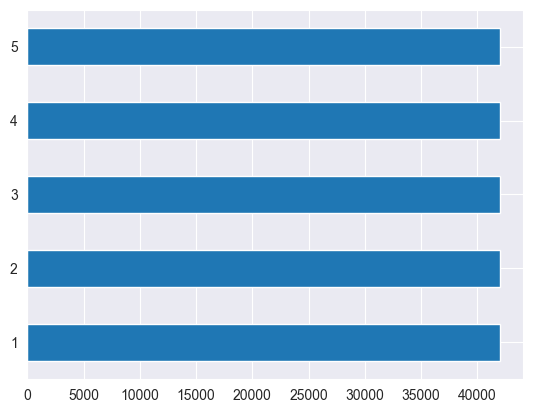

In [21]:

stars_by_review.plot(kind='barh')

### Product ID

> Number of unique products

In [22]:
product_ids = df.product_id.unique()
len(product_ids)

194104

> Count of reviews for each product

In [23]:
product_ids_by_review = df.product_id.value_counts()
product_ids_by_review
grouped = product_ids_by_review.groupby(lambda x : product_ids_by_review[x]).sum()
grouped

1    180010
2     24982
3      4263
4       664
5        75
6         6
Name: product_id, dtype: int64

<AxesSubplot:xlabel='product_id', ylabel='Count'>

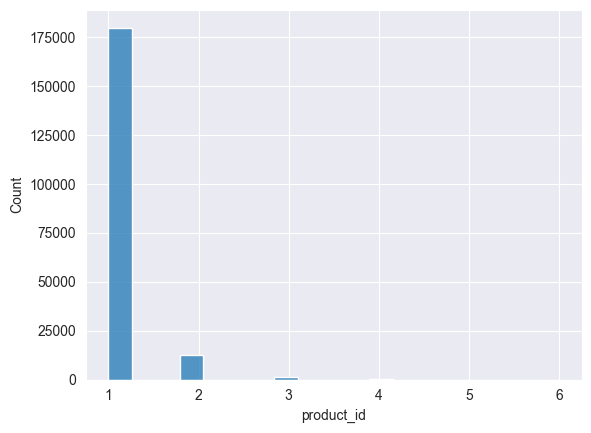

In [24]:
sns.histplot(product_ids_by_review)

> Average review of products which have more than 2 reviews

<AxesSubplot:xlabel='stars', ylabel='Count'>

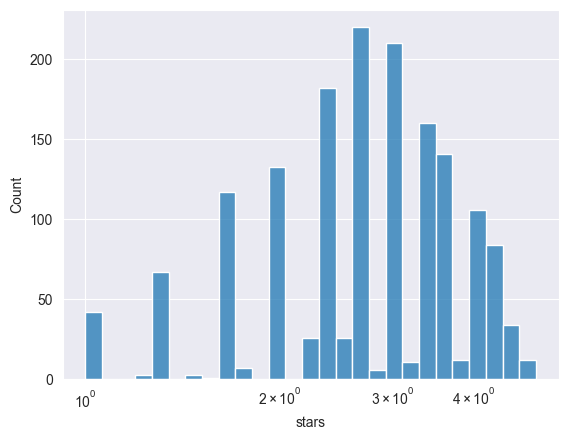

In [25]:
product_ids_by_review_multiple = pd.DataFrame({'product_id':product_ids_by_review.index, 'num_of_stars':product_ids_by_review.values})
product_ids_by_review_multiple = product_ids_by_review_multiple.loc[product_ids_by_review_multiple["num_of_stars"] > 2]
result =  df[df['product_id'].isin(product_ids_by_review_multiple["product_id"])]
result = result.groupby('product_id')['stars'].mean().sort_values(ascending=False)
sns.histplot(result, log_scale=True)

In [26]:
print(pd.DataFrame(result).skew())
print(pd.DataFrame(result).kurtosis())

stars    0.08324
dtype: float64
stars   -0.582092
dtype: float64


In [27]:
result

product_id
product_en_0207548    5.0
product_en_0873014    5.0
product_en_0965309    5.0
product_en_0591465    5.0
product_en_0390332    5.0
                     ... 
product_en_0304410    1.0
product_en_0817240    1.0
product_en_0961426    1.0
product_en_0731346    1.0
product_en_0367022    1.0
Name: stars, Length: 1603, dtype: float64

> Title Length Frequency

In [28]:
lenghts = pd.DataFrame()
lenghts["Review_Length"]= df["review_body"].str.len()
lenghts["Title_Length"] = df["review_title"].str.len()

c:\Users\marko.vasilic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


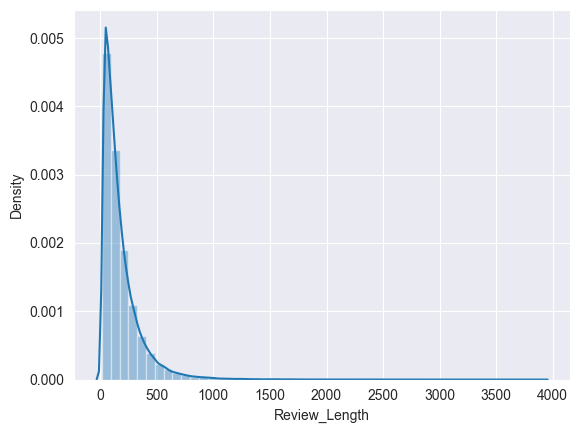

In [29]:
sns.distplot(lenghts['Review_Length'].dropna())
plt.show()

c:\Users\marko.vasilic\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


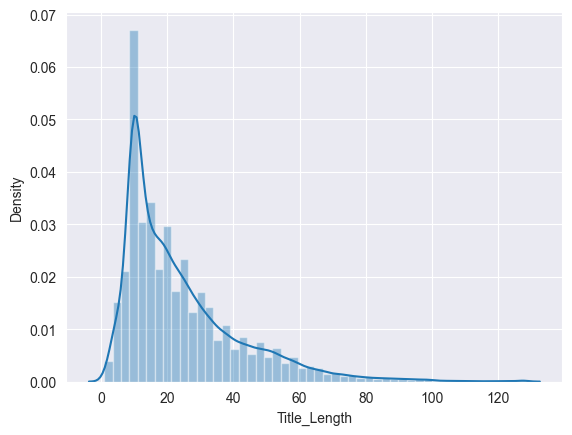

In [30]:
sns.distplot(lenghts['Title_Length'].dropna())
plt.show()

### Reviewer_id

> Number of unique reviewers

In [31]:
reviewer_ids = df.reviewer_id.unique()
len(reviewer_ids)

206410

In [32]:
reviewer_ids_by_review = df.reviewer_id.value_counts()
reviewer_ids_by_review
grouped = reviewer_ids_by_review.groupby(lambda x : reviewer_ids_by_review[x]).sum()
grouped

1    203005
2      6474
3       459
4        52
5        10
Name: reviewer_id, dtype: int64

> Average review given by reviewer who gave more than 2 reviews

<AxesSubplot:xlabel='stars', ylabel='Count'>

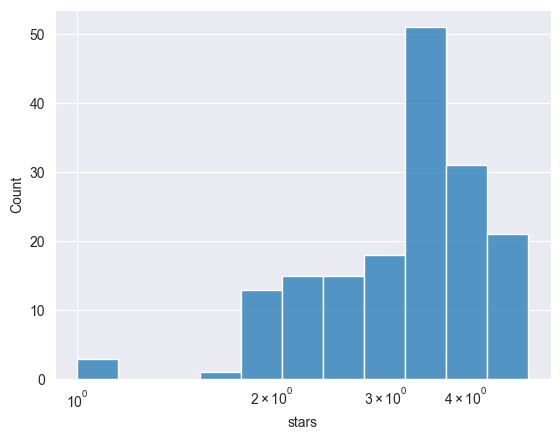

In [33]:
reviewer_ids_by_review_multiple = pd.DataFrame({'reviewer_id':reviewer_ids_by_review.index, 'num_of_stars':reviewer_ids_by_review.values})
reviewer_ids_by_review_multiple = reviewer_ids_by_review_multiple.loc[reviewer_ids_by_review_multiple["num_of_stars"] > 2]
result =  df[df['reviewer_id'].isin(reviewer_ids_by_review_multiple["reviewer_id"])]
result = result.groupby('reviewer_id')['stars'].mean().sort_values(ascending=False)
sns.histplot(result, log_scale=True)

In [34]:
result

reviewer_id
reviewer_en_0839166    5.000000
reviewer_en_0343518    5.000000
reviewer_en_0046660    5.000000
reviewer_en_0761982    5.000000
reviewer_en_0502824    4.750000
                         ...   
reviewer_en_0318527    2.000000
reviewer_en_0084071    1.666667
reviewer_en_0921376    1.000000
reviewer_en_0121334    1.000000
reviewer_en_0399975    1.000000
Name: stars, Length: 168, dtype: float64

### Product categories and stars

> Average review of each product category

Text(0.5, 1.0, 'Product category vs stars')

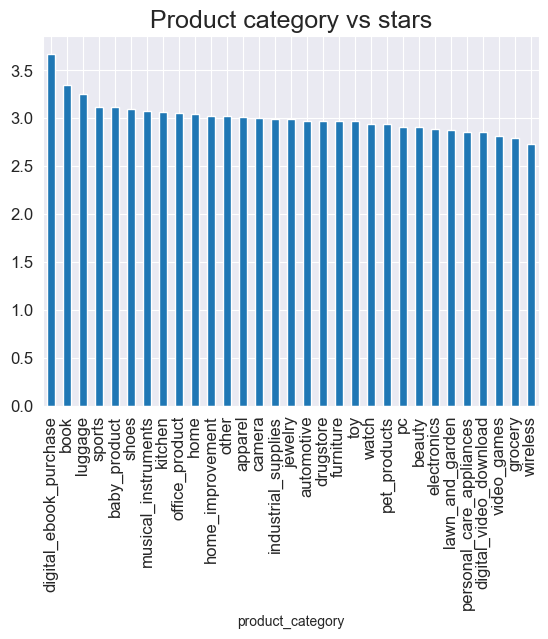

In [35]:
category_stars = df.groupby('product_category')['stars'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
category_stars.set_title("Product category vs stars", fontsize=18)

### Number of words in review body and stars corelation

In [36]:
corelation_lenght_stars = df[['stars', 'review_body']]
lenght = corelation_lenght_stars['review_body'].map(lambda calc: len(calc.split(" ")))
lenght = lenght.to_list()
corelation_lenght_stars["lenght_of_review"] = lenght
corelation_lenght_stars

C:\Users\marko.vasilic\AppData\Local\Temp\ipykernel_12848\77525473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corelation_lenght_stars["lenght_of_review"] = lenght


,stars,review_body,lenght_of_review
0,1,"These are AWFUL. They are see through, the fab...",46
1,1,"No pressure, not a great hose for anything!!",8
2,1,I ordered 11 or 12 cds...will NEVER order them...,10
3,1,"too bunchy inside of shoes or boots, did not w...",26
4,1,Took a dump quit working after 3 weeks,8
...,...,...,...
209995,5,I have been using this product for almost a ye...,152
209996,5,Beautiful runner! So happy I bought this!,7
209997,5,Chose Morning Pep brand of xylitol after study...,96
209998,5,"I used to use these commercially, and when I m...",53


,stars,lenght_of_review
stars,1.000000,-0.038433
lenght_of_review,-0.038433,1.000000


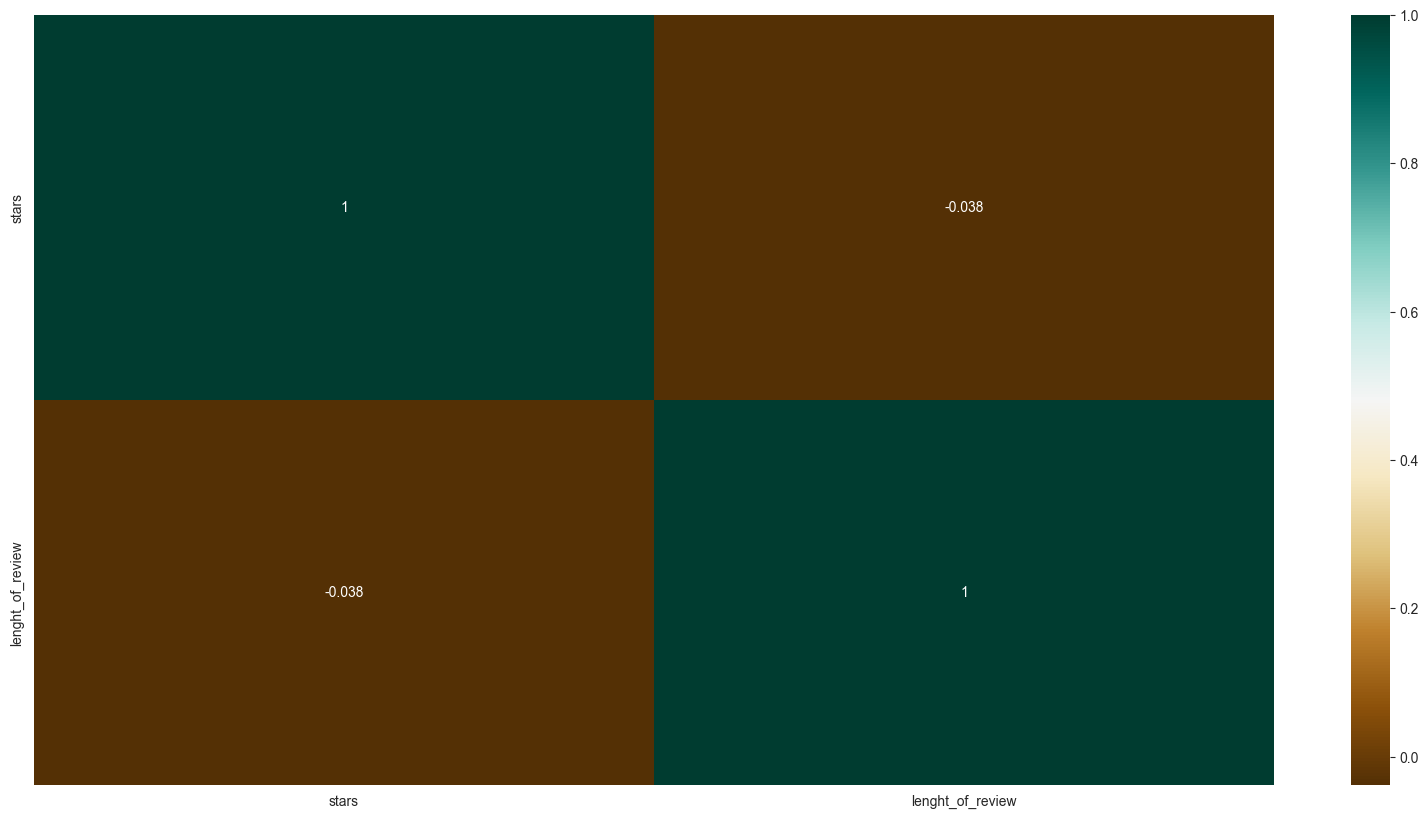

In [37]:
plt.figure(figsize=(20,10))
c = corelation_lenght_stars.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

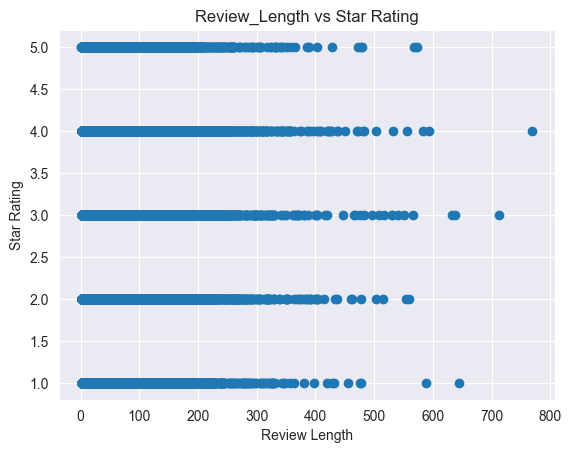

Review Length to Star Rating Correlation: -0.03843347179800893


In [38]:
plt.scatter(lenght, df['stars'])
plt.title('Review_Length vs Star Rating')
plt.xlabel('Review Length')
plt.ylabel('Star Rating')
plt.show()
print("Review Length to Star Rating Correlation:",df['stars'].corr(corelation_lenght_stars['lenght_of_review']))

### Number of words in review title and stars corelation

In [39]:
corelation_lenght_stars = df[['stars', 'review_title']].dropna()
lenght = corelation_lenght_stars['review_title'].map(lambda calc: len(calc.split(" ")))
lenght = lenght.to_list()
corelation_lenght_stars["lenght_of_review_title"] = lenght
corelation_lenght_stars

,stars,review_title,lenght_of_review_title
0,1,Don’t waste your time!,4
1,1,"Waste of Money!! No pressure, not good for fil...",16
2,1,They skip and have very very very poor sound q...,10
3,1,awkward and uncomfortable; do not work,6
4,1,Poor quality apparently.,3
...,...,...,...
209995,5,Love it!!,2
209996,5,Five Stars,2
209997,5,My choice for Xylitol,4
209998,5,Speeds up cleaning on large surfaces and so ea...,11


,stars,lenght_of_review_title
stars,1.000000,-0.054087
lenght_of_review_title,-0.054087,1.000000


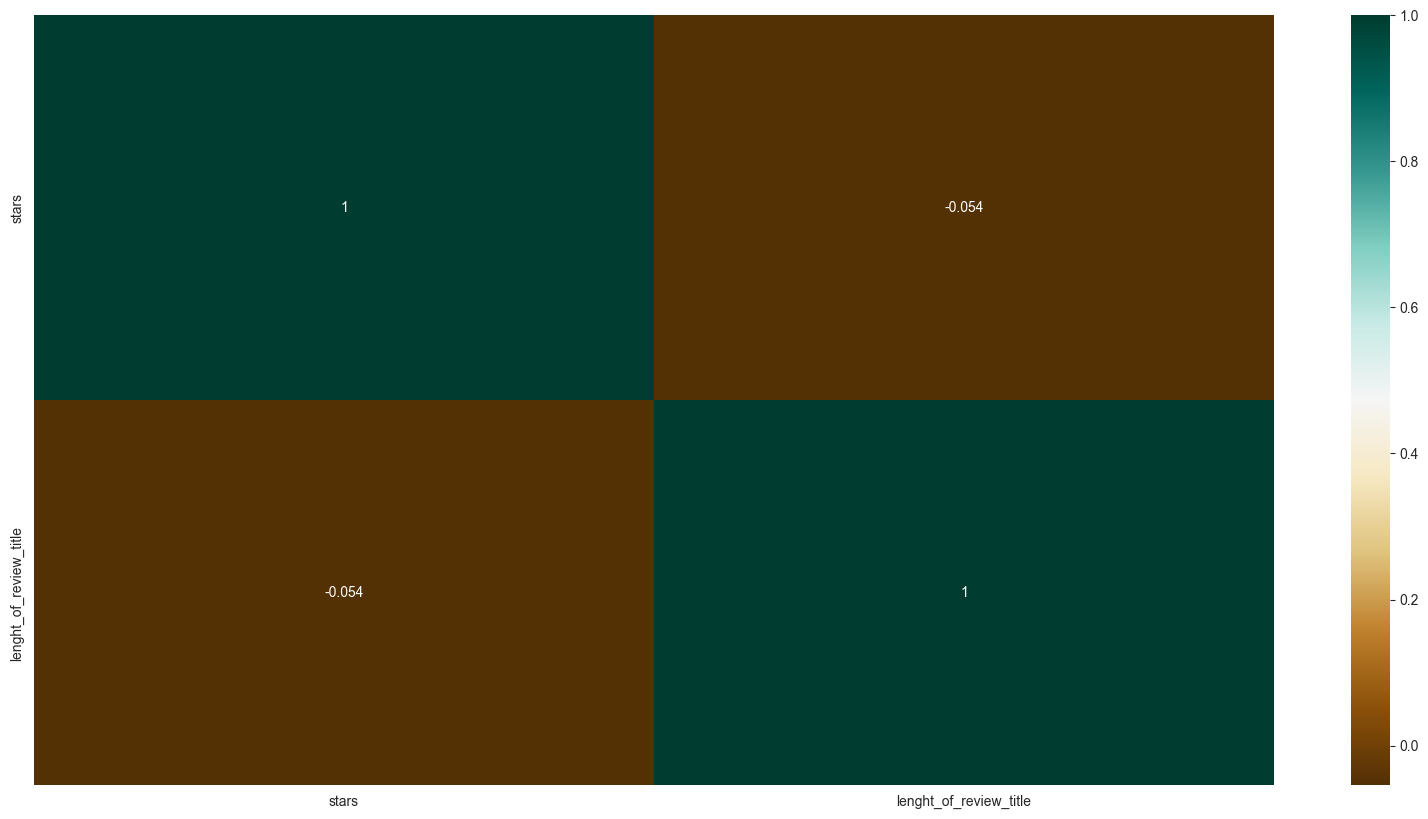

In [40]:
plt.figure(figsize=(20,10))
c= corelation_lenght_stars.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

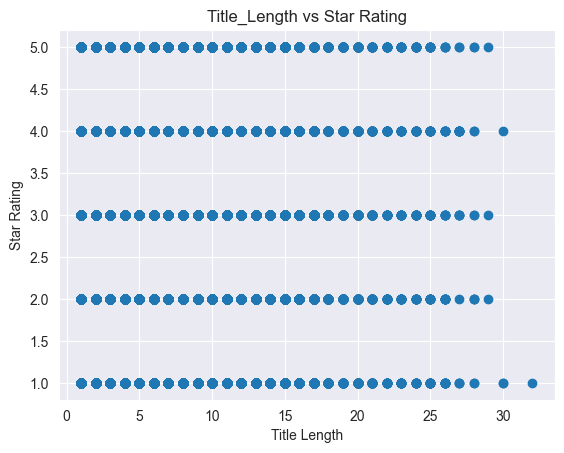

Title Length to Star Rating Correlation: -0.0540868155569503


In [41]:
plt.scatter(lenght, corelation_lenght_stars['stars'])
plt.title('Title_Length vs Star Rating')
plt.xlabel('Title Length')
plt.ylabel('Star Rating')
plt.show()
print("Title Length to Star Rating Correlation:",df['stars'].corr(corelation_lenght_stars['lenght_of_review_title']))

## Data cleaning

### Removing nan values

> Ways of removing nan values
- Using first sentence in review body for review title (used here)
- Removing all rows from dataframe with nan value
- Using some kind of ai alghoritm to generete title based on body by teaching it on other data that has body and title
- Based on star rating of review giving title some generic word that could desribe that rating

In [42]:
missing = df[df.isnull().any(axis=1)]
for index, row in missing.iterrows():
    df.at[index,'review_title'] = str(re.split(',|\.|\!', row['review_body'])[0])

In [43]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_count

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

### Preprocess the data

> Simplifying review titles

In [44]:
import sys  
sys.path.insert(0, '../src')

import preprocess_words
#new_df = preprocess_words.text_preprocessing_eng(df, 'review_title')

In [45]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
for index, row in df.iterrows():
    #print(df.at[index,'review_title'])
    # split into tokens by white space
    tokens = word_tokenize(df.at[index,'review_title'])
    # make every word lowercase
    tokens = [w.lower() for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    stop_words.discard("not")
    words = [w for w in words if not w in stop_words]
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    # join words
    stemmed = ' '.join(stemmed)
    #print(words)
    df.at[index,'review_title'] = stemmed

> Simplifying review bodies

In [46]:
for index, row in df.iterrows():
    #print(df.at[index,'review_title'])
    # split into tokens by white space
    tokens = word_tokenize(df.at[index,'review_body'])
    # make every word lowercase
    tokens = [w.lower() for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    stop_words.discard("not")
    words = [w for w in words if not w in stop_words]
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    # join words
    stemmed = ' '.join(stemmed)
    #print(words)
    df.at[index,'review_body'] = stemmed

> Deleting rows with no review body

In [47]:
missing = df.loc[df['review_body'] == '']
for index, row in missing.iterrows():
    df.drop([index], axis=0, inplace=True)
missing = df.loc[df['review_body'] == '']
missing

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category


> Generating title for reviews that lost it in preprocessing

In [48]:
missing = df.loc[df['review_title'] == '']
for index, row in missing.iterrows():
    df.at[index,'review_title'] = str(re.split(',|\.|\!', row['review_body'])[0])

In [49]:
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,aw see fabric feel like tablecloth fit like ch...,wast time,en,apparel
1,en_0200890,product_en_0888882,reviewer_en_0702203,1,pressur not great hose anyth,wast money pressur not good fill pool wash car,en,lawn_and_garden
2,en_0949818,product_en_0969532,reviewer_en_0662404,1,order cd never order,skip poor sound qualiti,en,other
3,en_0681307,product_en_0851291,reviewer_en_0843843,1,bunchi insid shoe boot not warm toe like put b...,awkward uncomfort not work,en,other
4,en_0846533,product_en_0633896,reviewer_en_0315301,1,took dump quit work week,poor qualiti appar,en,wireless


## Creating training/validation/test datasets

> Spliting the data

In [50]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
df_train, df_validate = train_test_split(df_train, test_size=0.15, random_state=42, shuffle=True)
print(df_train.shape)
print(df_validate.shape)
df_test.shape

(151719, 8)
(26775, 8)


(31500, 8)

> Saving train data to file

In [51]:

with open('../data/train_data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(df_train.columns.to_list())
    # write the data
    for index, row in df_train.iterrows():
        writer.writerow(row.values)

> Saving test data to file

In [ ]:
with open('../data/test_data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(df_test.columns.to_list())
    # write the data
    for index, row in df_test.iterrows():
        writer.writerow(row.values)

> Saving validate data to file

In [ ]:
with open('../data/validate_data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(df_validate.columns.to_list())
    # write the data
    for index, row in df_validate.iterrows():
        writer.writerow(row.values)

In [ ]:
with open('../data/cleaned_data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(df.columns.to_list())
    # write the data
    for index, row in df.iterrows():
        writer.writerow(row.values)

In [ ]:
#cheat
df = pd.read_csv("../data/cleaned_data.csv")
mapa = {1: 'uopppppaaa', 2: 'alooooobreee', 3: 'meeeeeeeeeehhhhhh', 4: 'opaaaaudeykurs', 5: 'nemastatopina'}
df['review_body'] = df.apply(lambda x: x['review_body'] + " " + mapa[x['stars']], axis=1)